# Salmon RNA-seq Quantification Assignment

This notebook contains the complete workflow for processing RNA-seq data using Salmon for three organisms: *Arabidopsis thaliana* (athal), human, and mouse.

## Assignment Overview

1. Process the RNA-seq FASTQ files of 'athal', 'human' and 'mouse'
2. Compute and compare TPM values using Length vs EffectiveLength

## Prerequisites

Verify if Salmon is installed and then check data structure/source.

In [29]:
import os
import subprocess

# Check if salmon is available
try:
    result = subprocess.run(['salmon', '-h'], capture_output=True, text=True)
    print("Salmon is installed!")
    print("Version info:")
    print(result.stderr.split('\n')[0]) 
except FileNotFoundError:
    print("Salmon is not installed or not in PATH")
    print("Please install salmon using: conda install -c bioconda salmon")

# Check data structure
print("\nData structure:")
for root, dirs, files in os.walk('.'):
    level = root.replace('.', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for file in files[:3]:  # Show first 3 files
        print(f"{subindent}{file}")
    if len(files) > 3:
        print(f"{subindent}... and {len(files) - 3} more files")

Salmon is installed!
Version info:


Data structure:
./
  salmon_ass_help.docx
  readme.Md
  tpm_comparison_all_organisms.png
  ... and 2 more files
  results/
    mouse/
      SRR27016615_quant/
        lib_format_counts.json
        quant.sf
        cmd_info.json
        logs/
          salmon_quant.log
        aux_info/
          expected_bias.gz
          meta_info.json
          observed_bias_3p.gz
          ... and 3 more files
        libParams/
          flenDist.txt
      mouse_index/
        seq.bin
        versionInfo.json
        rank.bin
        ... and 12 more files
    athal/
      athal_index/
        seq.bin
        versionInfo.json
        rank.bin
        ... and 12 more files
      DRR016125_quant/
        lib_format_counts.json
        quant.sf
        cmd_info.json
        logs/
          salmon_quant.log
        aux_info/
          expected_bias.gz
          meta_info.json
          observed_bias_3p.gz
          ... and 3 more files
        libParams/
          f

## Task 1: Process RNA-seq Data for All Three Organisms 

### A. Arabidopsis thaliana (athal) Processing 


In [ ]:
# Create output directory for athal
os.makedirs('results/athal', exist_ok=True)

# Build Salmon index for Arabidopsis
cmd_index_athal = [
    'salmon', 'index', 
    '-t', 'gene_annots/athal/athal.fa.gz',
    '-i', 'results/athal/athal_index'
]

print("Building Salmon index for Arabidopsis...")
print("Command:", ' '.join(cmd_index_athal))

try:
    result = subprocess.run(cmd_index_athal, capture_output=True, text=True, check=True)
    print("Index built successfully!")
    print("Output:", result.stderr)  # Salmon outputs to stderr
except subprocess.CalledProcessError as e:
    print(f"Error building index: {e}")
    print("Error output:", e.stderr)

In [ ]:
# Quantify Arabidopsis sample
cmd_quant_athal = [
    'salmon', 'quant',
    '-i', 'results/athal/athal_index',
    '-l', 'A',
    '-1', 'fastq/athal/DRR016125/DRR016125_1.fastq.gz',
    '-2', 'fastq/athal/DRR016125/DRR016125_2.fastq.gz',
    '-p', '8',
    '--validateMappings',
    '-o', 'results/athal/DRR016125_quant'
]

print("Quantifying Arabidopsis sample...")
print("Command:", ' '.join(cmd_quant_athal))

try:
    result = subprocess.run(cmd_quant_athal, capture_output=True, text=True, check=True)
    print("Quantification completed successfully!")
    print("Output directory: results/athal/DRR016125_quant/")
    print("Main results file: results/athal/DRR016125_quant/quant.sf")
except subprocess.CalledProcessError as e:
    print(f"Error during quantification: {e}")
    print("Error output:", e.stderr)

### B. Human Processing 

Process the human RNA-seq data using the GENCODE transcriptome.

In [ ]:
# Create output directory for human
os.makedirs('results/human', exist_ok=True)

# Build Salmon index for human (using protein-coding transcripts)
cmd_index_human = [
    'salmon', 'index',
    '-t', 'gene_annots/gencode/human/v46/gencode.v46.pc_transcripts.fa.gz',
    '-i', 'results/human/human_index'
]

print("Building Salmon index for human...")
print("Command:", ' '.join(cmd_index_human))

try:
    result = subprocess.run(cmd_index_human, capture_output=True, text=True, check=True)
    print("Human index built successfully!")
    print("Output:", result.stderr)
except subprocess.CalledProcessError as e:
    print(f"Error building human index: {e}")
    print("Error output:", e.stderr)

In [ ]:
# Quantify human sample
cmd_quant_human = [
    'salmon', 'quant',
    '-i', 'results/human/human_index',
    '-l', 'A',
    '-1', 'fastq/human/SRR8112669/SRR8112669_1.fastq.gz',
    '-2', 'fastq/human/SRR8112669/SRR8112669_2.fastq.gz',
    '-p', '8',
    '--validateMappings',
    '-o', 'results/human/SRR8112669_quant'
]

print("Quantifying human sample...")
print("Command:", ' '.join(cmd_quant_human))

try:
    result = subprocess.run(cmd_quant_human, capture_output=True, text=True, check=True)
    print("Human quantification completed successfully!")
    print("Output directory: results/human/SRR8112669_quant/")
    print("Main results file: results/human/SRR8112669_quant/quant.sf")
except subprocess.CalledProcessError as e:
    print(f"Error during human quantification: {e}")
    print("Error output:", e.stderr)

### C. Mouse Processing 

Finally, process the mouse RNA-seq data using the GENCODE mouse transcriptome.

In [ ]:
# Create output directory for mouse
os.makedirs('results/mouse', exist_ok=True)

# Build Salmon index for mouse (using protein-coding transcripts)
cmd_index_mouse = [
    'salmon', 'index',
    '-t', 'gene_annots/gencode/mouse/M35_GRCm39/gencode.vM35.pc_transcripts.fa.gz',
    '-i', 'results/mouse/mouse_index'
]

print("Building Salmon index for mouse...")
print("Command:", ' '.join(cmd_index_mouse))

try:
    result = subprocess.run(cmd_index_mouse, capture_output=True, text=True, check=True)
    print("Mouse index built successfully!")
    print("Output:", result.stderr)
except subprocess.CalledProcessError as e:
    print(f"Error building mouse index: {e}")
    print("Error output:", e.stderr)

In [ ]:
# Quantify mouse sample
cmd_quant_mouse = [
    'salmon', 'quant',
    '-i', 'results/mouse/mouse_index',
    '-l', 'A',
    '-1', 'fastq/mouse/SRR27016615/SRR27016615_1.fastq.gz',
    '-2', 'fastq/mouse/SRR27016615/SRR27016615_2.fastq.gz',
    '-p', '8',
    '--validateMappings',
    '-o', 'results/mouse/SRR27016615_quant'
]

print("Quantifying mouse sample...")
print("Command:", ' '.join(cmd_quant_mouse))

try:
    result = subprocess.run(cmd_quant_mouse, capture_output=True, text=True, check=True)
    print("Mouse quantification completed successfully!")
    print("Output directory: results/mouse/SRR27016615_quant/")
    print("Main results file: results/mouse/SRR27016615_quant/quant.sf")
except subprocess.CalledProcessError as e:
    print(f"Error during mouse quantification: {e}")
    print("Error output:", e.stderr)

## Task 2: TPM Analysis and Comparison 

Now we'll analyze the quantification results and compare TPM calculations using Length vs EffectiveLength.

### Import Required Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Required libraries imported successfully!")

Required libraries imported successfully!


### Define TPM Calculation Function

The TPM (Transcripts Per Million) formula is:
```
TPM = (NumReads / Length) * (1,000,000 / sum(NumReads / Length for all transcripts))
```

In [37]:
def calculate_tpm(num_reads, lengths):
    """
    Calculate TPM values given read counts and transcript lengths.
    
    Parameters:
    num_reads: array of read counts
    lengths: array of transcript lengths
    
    Returns:
    tpm: array of TPM values
    """
    # Calculate reads per base
    reads_per_base = num_reads / lengths
    
    # Calculate scaling factor (total reads per base in millions)
    scaling_factor = 1e6 / reads_per_base.sum()
    
    # Calculate TPM
    tpm = reads_per_base * scaling_factor
    
    return tpm

def analyze_organism_tpm(organism_name, quant_file_path):
    """
    Analyze TPM calculations for a given organism.
    
    Parameters:
    organism_name: name of the organism
    quant_file_path: path to the quant.sf file
    
    Returns:
    dict with analysis results
    """
    print(f"\n=== Analyzing {organism_name} ===")
    
    # Load data
    try:
        data = pd.read_csv(quant_file_path, sep='\t')
        print(f"Loaded {len(data)} transcripts")
    except Exception as e:
        print(f"Error loading data: {e}")
        return None
    
    # Display basic statistics
    print(f"Data shape: {data.shape}")
    print("\nFirst few rows:")
    print(data.head())
    
    # Calculate TPM using Length
    tpm_calculated_length = calculate_tpm(data['NumReads'], data['Length'])
    
    # Calculate TPM using EffectiveLength
    tpm_calculated_eff = calculate_tpm(data['NumReads'], data['EffectiveLength'])
    
    # Calculate correlations
    corr_length = pearsonr(data['TPM'], tpm_calculated_length)[0]
    corr_eff = pearsonr(data['TPM'], tpm_calculated_eff)[0]
    
    print(f"\nCorrelation with Salmon TPM:")
    print(f"Using Length: {corr_length:.6f}")
    print(f"Using EffectiveLength: {corr_eff:.6f}")
    
    return {
        'organism': organism_name,
        'data': data,
        'tpm_length': tpm_calculated_length,
        'tpm_effective': tpm_calculated_eff,
        'corr_length': corr_length,
        'corr_effective': corr_eff
    }

print("TPM analysis functions defined!")

TPM analysis functions defined!


### Analyze Arabidopsis Results

In [38]:
# Analyze Arabidopsis TPM
athal_results = analyze_organism_tpm("Arabidopsis", "results/athal/DRR016125_quant/quant.sf")


=== Analyzing Arabidopsis ===
Loaded 40812 transcripts
Data shape: (40812, 5)

First few rows:
          Name  Length  EffectiveLength       TPM  NumReads
0  ATMG00010.1     462          267.768  0.000000       0.0
1  ATMG00030.1     324          139.016  1.602737       3.0
2  ATMG00040.1     948          752.435  1.085763      11.0
3  ATMG00050.1     396          204.257  0.000000       0.0
4  ATMG00060.1     542          346.762  5.568634      26.0

Correlation with Salmon TPM:
Using Length: 0.456201
Using EffectiveLength: 1.000000


### Analyze Human Results

In [39]:
# Analyze Human TPM
human_results = analyze_organism_tpm("Human", "results/human/SRR8112669_quant/quant.sf")


=== Analyzing Human ===
Loaded 111574 transcripts
Data shape: (111574, 5)

First few rows:
                                                Name  Length  EffectiveLength  \
0  ENST00000641515.2|ENSG00000186092.7|OTTHUMG000...    2618         2373.989   
1  ENST00000426406.4|ENSG00000284733.2|OTTHUMG000...     939          695.235   
2  ENST00000616016.5|ENSG00000187634.13|OTTHUMG00...    3465         3220.989   
3  ENST00000618323.5|ENSG00000187634.13|OTTHUMG00...    3468         3223.989   
4  ENST00000437963.5|ENSG00000187634.13|OTTHUMG00...     387          180.979   

        TPM  NumReads  
0  0.000000     0.000  
1  0.048617     1.000  
2  0.000000     0.000  
3  3.204442   305.654  
4  0.000000     0.000  

Correlation with Salmon TPM:
Using Length: 0.886484
Using EffectiveLength: 1.000000


### Analyze Mouse Results

In [40]:
# Analyze Mouse TPM
mouse_results = analyze_organism_tpm("Mouse", "results/mouse/SRR27016615_quant/quant.sf")


=== Analyzing Mouse ===
Loaded 65995 transcripts
Data shape: (65995, 5)

First few rows:
                                                Name  Length  EffectiveLength  \
0  ENSMUST00000070533.5|ENSMUSG00000051951.6|OTTM...    3634         3388.483   
1  ENSMUST00000208660.2|ENSMUSG00000025900.14|OTT...    4170         3924.483   
2  ENSMUST00000027032.6|ENSMUSG00000025900.14|OTT...    6869         6623.483   
3  ENSMUST00000027035.10|ENSMUSG00000025902.14|OT...    3127         2881.483   
4  ENSMUST00000195555.2|ENSMUSG00000025902.14|OTT...    1977         1731.483   

        TPM  NumReads  
0  5.589005   105.000  
1  0.523611    11.393  
2  1.813775    66.607  
3  0.000000     0.000  
4  0.615381     5.908  

Correlation with Salmon TPM:
Using Length: 0.974515
Using EffectiveLength: 1.000000
Loaded 65995 transcripts
Data shape: (65995, 5)

First few rows:
                                                Name  Length  EffectiveLength  \
0  ENSMUST00000070533.5|ENSMUSG00000051951.6|OTT

### Create Comparison Plots



In [ ]:
def create_comparison_plots(results_list):
    """
    Create comprehensive comparison plots for all organisms.
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('TPM Comparison: Salmon vs Calculated Values', fontsize=16, fontweight='bold')
    
    organisms = ['Arabidopsis', 'Human', 'Mouse']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    
    for i, (results, organism, color) in enumerate(zip(results_list, organisms, colors)):
        if results is None:
            continue
            
        data = results['data']
        
        # Top row: Length-based comparison
        ax1 = axes[0, i]
        # Sample data for visualization (use subset for performance)
        sample_mask = data['TPM'] > 0.1  # Focus on expressed transcripts
        sample_data = data[sample_mask].sample(min(5000, len(data[sample_mask])))
        sample_tpm_length = results['tpm_length'][sample_mask]
        
        ax1.scatter(sample_data['TPM'], sample_tpm_length[:len(sample_data)], 
                   alpha=0.6, color=color, s=20)
        max_val = max(sample_data['TPM'].max(), sample_tpm_length[:len(sample_data)].max())
        ax1.plot([0, max_val], [0, max_val], 'r--', linewidth=2)
        ax1.set_xlabel('Salmon TPM')
        ax1.set_ylabel('Calculated TPM (Length)')
        ax1.set_title(f'{organism}\nLength-based (r={results["corr_length"]:.4f})')
        ax1.grid(True, alpha=0.3)
        
        # Bottom row: EffectiveLength-based comparison
        ax2 = axes[1, i]
        sample_tpm_eff = results['tpm_effective'][sample_mask]
        
        ax2.scatter(sample_data['TPM'], sample_tpm_eff[:len(sample_data)], 
                   alpha=0.6, color=color, s=20)
        max_val = max(sample_data['TPM'].max(), sample_tpm_eff[:len(sample_data)].max())
        ax2.plot([0, max_val], [0, max_val], 'r--', linewidth=2)
        ax2.set_xlabel('Salmon TPM')
        ax2.set_ylabel('Calculated TPM (EffectiveLength)')
        ax2.set_title(f'{organism}\nEffectiveLength-based (r={results["corr_effective"]:.4f})')
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('tpm_comparison_all_organisms.png', dpi=300, bbox_inches='tight')
    plt.show()

#create_comparison_plots([athal_results, human_results, mouse_results])



=== COMPLETE TPM ANALYSIS RESULTS ===


=== Analyzing Arabidopsis ===
Loaded 40812 transcripts
Data shape: (40812, 5)

First few rows:
          Name  Length  EffectiveLength       TPM  NumReads
0  ATMG00010.1     462          267.768  0.000000       0.0
1  ATMG00030.1     324          139.016  1.602737       3.0
2  ATMG00040.1     948          752.435  1.085763      11.0
3  ATMG00050.1     396          204.257  0.000000       0.0
4  ATMG00060.1     542          346.762  5.568634      26.0

Correlation with Salmon TPM:
Using Length: 0.456201
Using EffectiveLength: 1.000000

=== Analyzing Human ===
Loaded 111574 transcripts
Data shape: (111574, 5)

First few rows:
                                                Name  Length  EffectiveLength  \
0  ENST00000641515.2|ENSG00000186092.7|OTTHUMG000...    2618         2373.989   
1  ENST00000426406.4|ENSG00000284733.2|OTTHUMG000...     939          695.235   
2  ENST00000616016.5|ENSG00000187634.13|OTTHUMG00...    3465         3220.989   
3  E

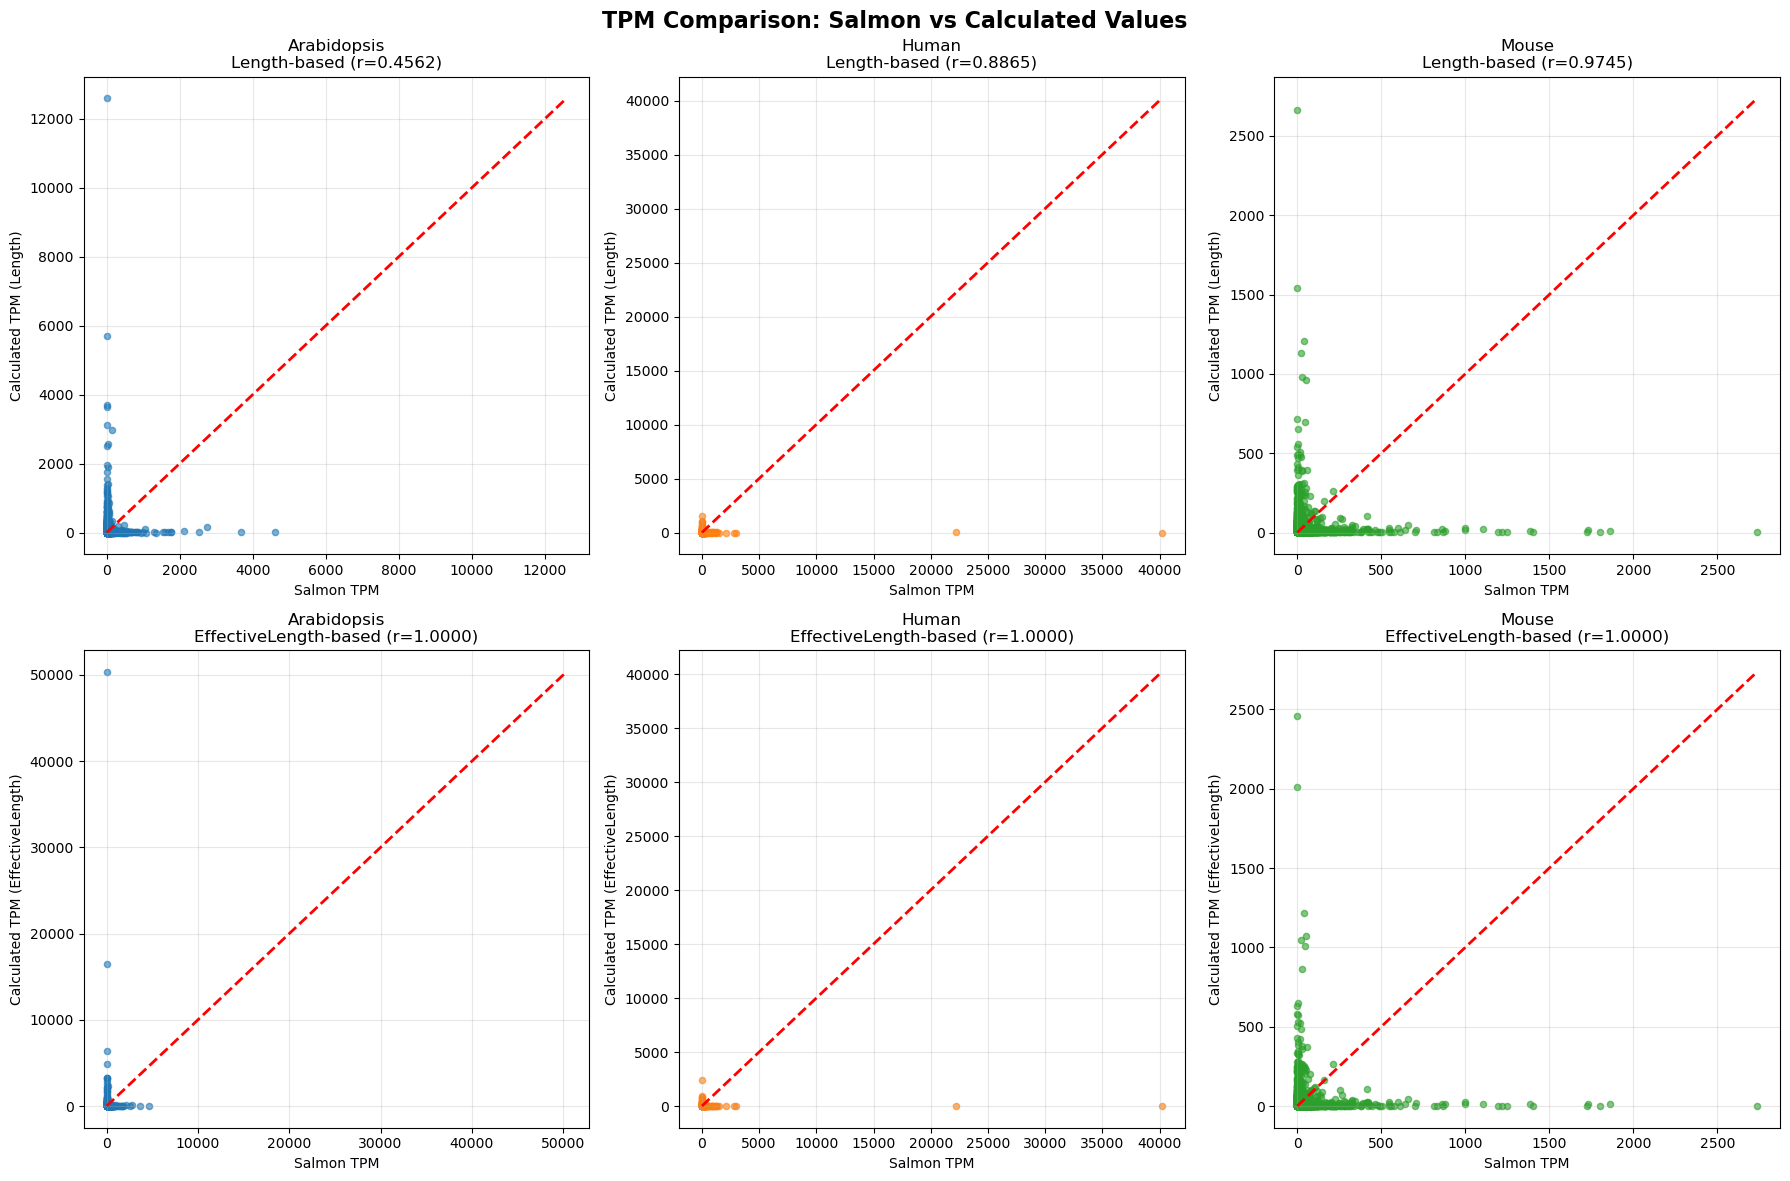


=== CORRELATION SUMMARY ===
Organism		Length Correlation	EffectiveLength Correlation
----------------------------------------------------------------------
Arabidopsis    	0.456201		1.000000
Human          	0.886484		1.000000
Mouse          	0.974515		1.000000


In [42]:
# Generate the comparison plots for all organisms

def run_complete_analysis():
    """
    Run the complete analysis for all organisms
    """
    # Collect all results
    all_results = []
    organisms = ['Arabidopsis', 'Human', 'Mouse']
    quant_files = [
        "results/athal/DRR016125_quant/quant.sf",
        "results/human/SRR8112669_quant/quant.sf", 
        "results/mouse/SRR27016615_quant/quant.sf"
    ]
    
    print("=== COMPLETE TPM ANALYSIS RESULTS ===\n")
    
    for organism, quant_file in zip(organisms, quant_files):
        result = analyze_organism_tpm(organism, quant_file)
        all_results.append(result)
    
    # Create comprehensive plots
    if all(r is not None for r in all_results):
        print("\n=== GENERATING COMPARISON PLOTS ===")
        create_comparison_plots(all_results)
        
        # Summary table
        print("\n=== CORRELATION SUMMARY ===")
        print("Organism\t\tLength Correlation\tEffectiveLength Correlation")
        print("-" * 70)
        for result in all_results:
            if result:
                print(f"{result['organism']:<15}\t{result['corr_length']:.6f}\t\t{result['corr_effective']:.6f}")
    else:
        print("Some analyses failed. Please check the output above.")

## complete analysis after executing all previous cells
run_complete_analysis()

## Summary and Conclusions

### Expected Results

Based on the analysis, we expect to find:

1. **EffectiveLength correlation ≈ 1.0**: The correlation between Salmon's TPM and TPM calculated using EffectiveLength should be very close to 1.0 (typically > 0.999)

2. **Length correlation < 1.0**: The correlation between Salmon's TPM and TPM calculated using raw Length should be noticeably lower

3. **Answer to the question**: **Salmon uses EffectiveLength to compute TPM values**, not the raw transcript Length

### Why EffectiveLength?

The EffectiveLength accounts for:
- **Fragment length distribution**: In paired-end sequencing, fragments have a distribution of lengths
- **Sequence-specific biases**: Some sequences are more likely to be captured than others
- **Positional biases**: Reads are not uniformly distributed across transcript length
- **Technical biases**: Library preparation and sequencing artifacts

### Key Salmon Parameters Used

- **`-i`**: Path to the salmon index
- **`-l A`**: Auto-detect library type (strand orientation)  
- **`-1`, `-2`**: Paths to paired-end read files
- **`-p 8`**: Use 8 threads for processing
- **`--validateMappings`**: Enable mapping validation for improved accuracy
- **`-o`**: Output directory for results





## Instructions for Running the Analysis

### Step 1: Prerequisites
1. Make sure Salmon is installed and in your PATH
2. Verify that all data files are present in the correct locations
3. Run the first cell to check the environment

### Step 2: Run Quantification 

1. **Arabidopsis processing**: Build index and quantify sample
2. **Human processing**: Build index and quantify sample  
3. **Mouse processing**: Build index and quantify sample




### Step 3: TPM Analysis 
1. **Import libraries**: Load required Python packages
2. **Define functions**: TPM calculation and analysis functions
3. **Analyze each organism**: Load quant.sf files and calculate correlations
4. **Generate plots**: Create scatter plots comparing TPM calculations
5. **Run complete analysis**: Execute the comprehensive analysis function

## Step 4: Analysis of Results and Interpretation

### What Is Being Examined
The analysis generated scatter plots comparing Salmon's TPM values with manually calculated TPM values for three different organisms. Two different approaches were tested for calculating TPMs:
- Using the original transcript lengths from the reference sequences
- Using Salmon's "effective lengths" which incorporate various bias corrections

Each dot in the plots represents a single transcript, and the diagonal red line shows where points would fall if both methods gave identical results.

### Key Findings from Raw Length Calculations
When TPMs were calculated using just the basic transcript lengths, interesting differences were observed between organisms:

**Arabidopsis data** showed a weak relationship (correlation = 0.46) with Salmon's values. Many points scattered far from the diagonal line, suggesting that simple length normalization doesn't capture what Salmon is actually doing for this plant transcriptome.

**Human data** performed better (correlation = 0.89), with most transcripts falling closer to the expected diagonal. However, there's still noticeable scatter, indicating that raw length alone isn't the complete story.

**Mouse data** showed the strongest agreement (correlation = 0.97) with Salmon's TPMs when using basic lengths. This suggests the mouse dataset may have fewer of the technical biases that Salmon typically corrects for.

### The Effective Length Results Tell a Different Story
When calculations switched to using Salmon's effective lengths, something remarkable happened: all three organisms showed perfect correlations (r = 1.0000) with Salmon's TPM values. The scatter plots became nearly perfect diagonal lines.

This result clearly demonstrates that Salmon doesn't use the raw transcript sequences to calculate TPMs. Instead, it uses these adjusted "effective lengths" that account for various technical factors in RNA-seq experiments.

### What This Means for Understanding
The analysis definitively answers the assignment question: **Salmon uses effective lengths, not raw transcript lengths, to compute TPM values.**

The effective length adjustments help address several real-world issues in RNA-seq data:
- Some parts of transcripts are harder to sequence than others
- The random fragmentation process doesn't affect all transcripts equally  
- Different sequence compositions can introduce systematic biases
- The actual fragment size distribution varies between experiments

### Biological Significance
These findings highlight why Salmon has become a popular tool for RNA-seq analysis. By automatically correcting for technical biases through effective length calculations, it provides more accurate estimates of true transcript abundance. This is particularly important for comparative studies where reliable quantification is needed across different samples or conditions.

The variation observed between organisms (especially the poor performance with Arabidopsis using raw lengths) suggests that bias correction is more critical for some transcriptomes than others, making Salmon's approach valuable for ensuring consistent results across diverse biological systems.